Using device: cpu


100%|██████████| 27/27 [15:46<00:00, 35.05s/it]


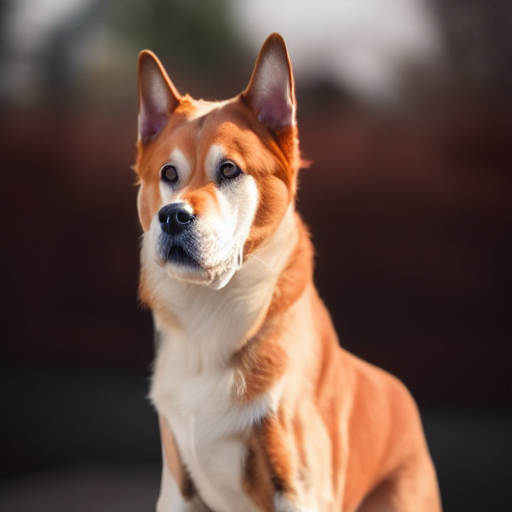

In [4]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Same dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [1]:
!pip install torchmetrics


Defaulting to user installation because normal site-packages is not writeable


C:\Users\SRE\AppData\Local\Temp\ipykernel_18564\213309560.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device: cpu


100%|██████████| 25/25 [02:58<00:00,  7.12s/it]


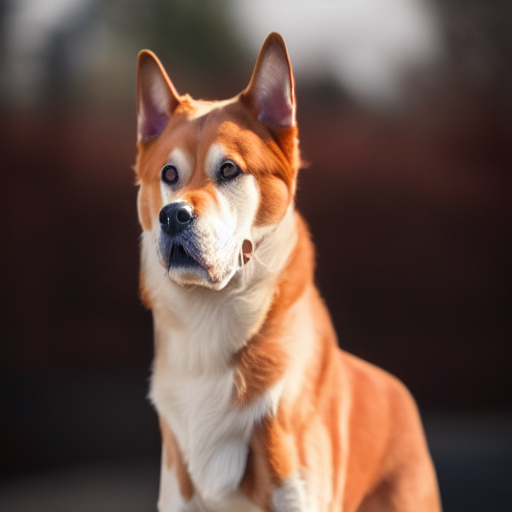

In [11]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Same dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.5

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

In [1]:
# Import necessary libraries
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

# Define device based on availability (CPU, CUDA, or MPS)
DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

# Set DEVICE based on availability of CUDA or MPS support
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

# Load the CLIP Tokenizer (make sure the paths to vocab and merges file are correct)
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")

# Define the model file path for the diffusion model (ensure path is correct)
model_file = "data/v1-5-pruned-emaonly.ckpt"

# Load models using the model_loader utility (make sure model_loader is implemented correctly)
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Define text-to-image and image-to-image parameters
prompt = "Same dog"
uncond_prompt = ""  # Negative prompt (empty for no negative prompt)
do_cfg = True  # Conditional generation flag (use classifier-free guidance)
cfg_scale = 8  # Classifier-Free Guidance scale (between 1 and 14)

# For image-to-image, load an input image
input_image = None
image_path = "images/dog.jpg"  # Path to your input image (adjust path as necessary)

# Load the image if needed
if image_path:
    input_image = Image.open(image_path)

# Strength of the transformation in image-to-image (higher strength means more noise)
strength = 0.5

# Sampler configuration (using DDPM)
sampler = "ddpm"
num_inference_steps = 50  # Number of inference steps for the diffusion process
seed = 42  # Random seed for reproducibility

# Generate image using the pipeline with optional FGSM attack
output_image = pipeline.generate_with_fgsm(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    tokenizer=tokenizer,
    attack_epsilon=0.1,  # Apply FGSM attack with epsilon value
)

# Display the generated image
Image.fromarray(output_image).show()


c:\Users\SRE\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'torchvision'

In [ ]:
!pip install 

In [ ]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"
ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# TEXT TO IMAGE
prompt = "A dog with sunglasses, wearing a comfy hat, looking at the camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  
do_cfg = True
cfg_scale = 8
input_image = None

# IMAGE TO IMAGE
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
strength = 0.55

sampler = "ddpm"
num_inference_steps = 50
seed = 42
epsilon = 0.1  # FGSM attack strength

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    epsilon=epsilon,  
)

Image.fromarray(output_image)


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\SRE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

In [4]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Any image 0 to 9"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42



acc , ex = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
    epsilon = 0.3,
)

# Combine the input image and the output image into a single image.
print(acc)

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\SRE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

In [1]:
DEVICE = "cpu"  # default device

# Check if CUDA is available and use it
if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"  # Metal Performance Shaders (for Mac users)
    
print(f"Using device: {DEVICE}")


NameError: name 'torch' is not defined

In [ ]:
import model_loader
import pipeline
from PIL import Image
import torch
import numpy as np
import os
from transformers import CLIPTokenizer

# Device setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Tokenizer and model loading
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Text-to-Image generation setup (for CIFAR-10 style)
prompt = "A colorful image of a dog"  # Adjust the prompt based on the image you want
uncond_prompt = ""  # Negative prompt (for unconditioned generation)
do_cfg = True
cfg_scale = 8

# Sampler settings (DDPM sampler similar to authors' method)
sampler = "ddpm"
num_inference_steps = 50  # Adjust as needed
num_images = 1000  # Number of images to generate for IS calculation
output_dir = "generated_images"  # Directory to save images
os.makedirs(output_dir, exist_ok=True)

# Image generation loop
generated_images = []

for i in range(num_images):
    seed = np.random.randint(0, 10000)  # Random seed for each image
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=None,  # No input image for text-to-image generation
        strength=0.75,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    # Save each generated image
    image_filename = os.path.join(output_dir, f"generated_image_{i+1}.png")
    Image.fromarray(output_image).save(image_filename)
    generated_images.append(image_filename)  # Store file path for later evaluation


In [ ]:
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F
from scipy.stats import entropy
import numpy as np
import os
from PIL import Image

def inception_score(imgs, batch_size=32, splits=10):
    """Calculate the Inception Score for the generated images."""
    # Load the pre-trained InceptionV3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).to(DEVICE)
    inception_model.eval()

    # Preprocess the images
    def preprocess_image(img):
        preprocess = transforms.Compose([
            transforms.Resize(299),
            transforms.CenterCrop(299),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        return preprocess(img).unsqueeze(0).to(DEVICE)

    # Split the images into batches and calculate the inception score
    def get_predicted_class_probs(images):
        images = torch.stack([preprocess_image(img) for img in images])
        with torch.no_grad():
            preds = inception_model(images)
            if preds.size(1) != 1000:
                # For InceptionV3, ensure output size is 1000 (CIFAR-10 is a 10-class problem)
                preds = F.adaptive_avg_pool2d(preds, (299, 299))
            return F.softmax(preds, dim=1).cpu().numpy()

    # Calculate the Inception Score
    def calculate_is(images, splits):
        N = len(images)
        split_scores = []
        for k in range(splits):
            part = images[k * (N // splits):(k + 1) * (N // splits)]
            preds = get_predicted_class_probs(part)
            split_score = np.mean([entropy(p) for p in preds])
            split_scores.append(split_score)
        return np.exp(np.mean(split_scores))

    # Generate predictions for the images and calculate IS
    all_images = [Image.open(img_path) for img_path in imgs]
    inception_score_val = calculate_is(all_images, splits)
    return inception_score_val

# Calculate IS on generated images
is_score = inception_score(generated_images)
print(f"Inception Score: {is_score}")


In [2]:
!pip install pytorch-fid


Defaulting to user installation because normal site-packages is not writeable


In [1]:
import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "Same dog"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "images/dog.jpg"
input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.55

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)

OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\SRE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

In [ ]:
import model_loader
import pipeline
from PIL import Image
import torch
import numpy as np
import os
from transformers import CLIPTokenizer

# Device setup
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Tokenizer and model loading
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Text-to-Image generation setup (for CIFAR-10 style)
prompt = "A colorful image of a dog"  # Adjust the prompt based on the image you want
uncond_prompt = ""  # Negative prompt (for unconditioned generation)
do_cfg = True
cfg_scale = 8

# Sampler settings (DDPM sampler similar to authors' method)
sampler = "ddpm"
num_inference_steps = 50  # Adjust as needed
num_images = 1000  # Number of images to generate for IS calculation
output_dir = "generated_images"  # Directory to save images
os.makedirs(output_dir, exist_ok=True)

# Image generation loop
generated_images = []

for i in range(num_images):
    seed = np.random.randint(0, 10000)  # Random seed for each image
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=None,  # No input image for text-to-image generation
        strength=0.75,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    # Save each generated image
    image_filename = os.path.join(output_dir, f"generated_image_{i+1}.png")
    Image.fromarray(output_image).save(image_filename)
    generated_images.append(image_filename)  # Store file path for later evaluation


In [ ]:
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F
from scipy.stats import entropy
import numpy as np
import os
from PIL import Image

def inception_score(imgs, batch_size=32, splits=10):
    """Calculate the Inception Score for the generated images."""
    # Load the pre-trained InceptionV3 model
    inception_model = models.inception_v3(pretrained=True, transform_input=False).to(DEVICE)
    inception_model.eval()

    # Preprocess the images
    def preprocess_image(img):
        preprocess = transforms.Compose([
            transforms.Resize(299),
            transforms.CenterCrop(299),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        return preprocess(img).unsqueeze(0).to(DEVICE)

    # Split the images into batches and calculate the inception score
    def get_predicted_class_probs(images):
        images = torch.stack([preprocess_image(img) for img in images])
        with torch.no_grad():
            preds = inception_model(images)
            if preds.size(1) != 1000:
                # For InceptionV3, ensure output size is 1000 (CIFAR-10 is a 10-class problem)
                preds = F.adaptive_avg_pool2d(preds, (299, 299))
            return F.softmax(preds, dim=1).cpu().numpy()

    # Calculate the Inception Score
    def calculate_is(images, splits):
        N = len(images)
        split_scores = []
        for k in range(splits):
            part = images[k * (N // splits):(k + 1) * (N // splits)]
            preds = get_predicted_class_probs(part)
            split_score = np.mean([entropy(p) for p in preds])
            split_scores.append(split_score)
        return np.exp(np.mean(split_scores))

    # Generate predictions for the images and calculate IS
    all_images = [Image.open(img_path) for img_path in imgs]
    inception_score_val = calculate_is(all_images, splits)
    return inception_score_val

# Calculate IS on generated images
is_score = inception_score(generated_images)
print(f"Inception Score: {is_score}")


In [ ]:
# demo.ipynb

import pipeline
from PIL import Image
import torch
import os

# Set up device and tokenizer as before
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# Load models and tokenizer
tokenizer = CLIPTokenizer("data/tokenizer_vocab.json", merges_file="data/tokenizer_merges.txt")
model_file = "data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Image generation setup (CIFAR-10 style)
prompt = "A colorful image of a dog"  # Example CIFAR-10 related prompt
num_images = 1000
output_dir = "generated_images"
os.makedirs(output_dir, exist_ok=True)

# Generate images
generated_images = []
for i in range(num_images):
    seed = np.random.randint(0, 10000)
    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt="",
        input_image=None,
        strength=0.75,
        do_cfg=True,
        cfg_scale=8,
        sampler_name="ddpm",
        n_inference_steps=50,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )

    image_filename = os.path.join(output_dir, f"generated_image_{i+1}.png")
    Image.fromarray(output_image).save(image_filename)
    generated_images.append(image_filename)

# Calculate IS
is_score = inception_score(generated_images)
print(f"Inception Score: {is_score}")


In [1]:
import torch
from torchvision import datasets, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pipeline
from transformers import CLIPTokenizer
import torch.nn as nn
import torch.nn.functional as F

# Define the device for computation (use CUDA if available)
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {DEVICE}")

# Load the tokenizer and models
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch16")  # Change to your tokenizer
model_file = "data/v1-5-pruned-emaonly.ckpt"  # Update with the correct model path
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

# Define the Encoder model (for demonstration, this could be a simple CNN or a more complex model)
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        return x  # Returning latent space (e.g., flattened feature vector)

# MNIST DataLoader
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, download=True, transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ])),
    batch_size=1, shuffle=True)

# Generate Image Function (using pipeline.py logic)
def generate_image(input_image, prompt, encoder, strength=0.8, sampler_name="ddpm", num_inference_steps=50, seed=42):
    output_image = pipeline.generate(
        input_image=input_image,
        encoder=encoder,
        prompt=prompt,
        strength=strength,
        sampler_name=sampler_name,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        tokenizer=tokenizer,
        fgsm_epsilon=0.1  # FGSM perturbation strength
    )
    return output_image

# Demo to show the whole process
def demo():
    # Get a random MNIST image from the test set
    data_iter = iter(test_loader)
    image, label = data_iter.next()

    # Show the original image
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Original MNIST Image: {label.item()}")
    plt.show()

    # Get the input image in the right format (latent space)
    input_image = image.to(DEVICE)

    # Initialize the Encoder model
    encoder = Encoder().to(DEVICE)
    encoder.eval()

    # Generate the image using the pipeline after applying FGSM to the latent space
    output_image = generate_image(input_image=input_image, prompt="A hand-written digit", encoder=encoder)

    # Convert the output to a PIL Image and display
    output_pil = Image.fromarray(output_image)
    output_pil.show()

# Run the demo
demo()


OSError: [WinError 126] The specified module could not be found. Error loading "C:\Users\SRE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\torch\lib\caffe2_nvrtc.dll" or one of its dependencies.

In [2]:
import demo1

ModuleNotFoundError: No module named 'demo1'